<a href="https://colab.research.google.com/github/linsut/DatSci/blob/master/ESA12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1sTO90PQRtbK80XdzMJ2KttRRtt9M7xuq'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('edlich-kmeans-A0.csv')  
df3 = pd.read_csv('edlich-kmeans-A0.csv')


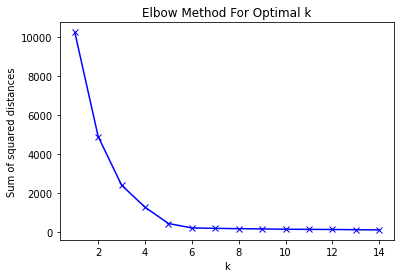

In [3]:
squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df3)
    squared_distances.append(km.inertia_)
  
plt.plot(K, squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**What is the best k?**

From the elbow graph it looks like k=5 is the optimal value.

**Print the clustering vector**

In [4]:
km = KMeans(n_clusters=5)
km = km.fit(df3)
clu = km.predict(df3)

print("Clusters for respective point(index = index): ", clu)

Clusters for respective point(index = index):  [1 4 4 2 4 3 2 4 0 2 4 0 2 3 1 4 0 3 1 1 4 0 1 4 4 2 0 0 0 3 0 0 3 3 4 1 3
 1 0 4 3 3 3 1 3 4 2 2 3 2 2 3 0 0 2 2 1 2 4 3 2 1 2 2 3 2 1 1 1 3 3 2 0 2
 2 0 4 3 2 0 0 3 4 1 1 4 1 1 1 2 0 0 0 4 2 2 0 3 1 1]


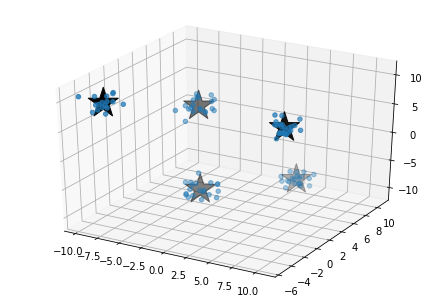

In [5]:
centers = km.cluster_centers_

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df3.V1, df3.V2, df3.V3)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', c='#050505', s=1000)